In [203]:
import string
import numpy as np

In [204]:
phrase = "To be, or not to be, that is the question"

In [205]:
phrase_list = [i for i in phrase]

In [206]:
def generate_random_individual(size):
    phrase = ''
    for letter in range(size):
        binary_letter_string = ''
        for j in [str(np.random.randint(0,2)) for i in range(7)]:
            binary_letter_string = binary_letter_string + j
        phrase = phrase + binary_letter_string
    return phrase

In [207]:
individual = generate_random_individual(len(phrase))
individual

'10101010110000100101001101100011110011000010111111000010011100011000000001001101010000011011010101000100110100111010110101101101110101010111101101111110011010011010001101110111001110001111001111000000101000000110111001111101110100001111100000011001011101100011110011010010010011111111000'

In [208]:
all_letters = string.printable[0:95]
all_letters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [209]:
def decode_binary_to_phrase(individual):
    phrase = ""
    for pos in range(0, len(individual), 7):
        binary_letter = str(individual[pos: pos+7])
        if int(binary_letter, 2) > 94:
            int_value = 94
        else:
            int_value = int(binary_letter, 2)
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [210]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'\\M-SuM %U 9[d\\9@]|W^| @zX;uY51}  !3nN A< '

In [211]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    return score

In [212]:
score = individual_score(phrase, individual_phrase)
score

3

In [229]:
text_list = []
for i in range(100):
    individual = generate_random_individual(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

11100011100011011001101010011101001001011001101110011010001010100110001100111111011001001001111010100110100111100001010110100100100010101000111110100101010101101011011010001101110101000010001010101100101010011001000011110000100001101001000100011010110000110110111101010110000010101100101
  PF mTqlo  A :ua hE lJS) 4G Cx &AzIrZIa 
4
____________________________________________________________________________________________________

11010010101010000000010010101001111110010101000110100111110000000001001101001011001000010110101100000010111000001011011110101001110110011100001110001111010101101011101011110110111101011111100110100110000001000001010011101100110011001000101011000101111011001101001010111001010011101010010
 G0-< zD 4 ObI5 | XssZJW Z"qMgF  y_  - ;?
1
____________________________________________________________________________________________________

000010001111000000001011001010010010110001111111000010111100010001010011010000100010011011100100001001111011100110100101010101100001

In [231]:
text_list

['  PF mTqlo  A :ua hE lJS) 4G Cx &AzIrZIa ',
 ' G0-< zD 4 ObI5 | XssZJW Z"qMgF  y_  - ;?',
 '4Y1O,N b k yTg<V?\\&|S N JG; =: b-_]P{8 sB',
 '#?zO@  bs! 64Z Q $S>-m L UOzEh7\\G~R*q 3!n',
 ".v}~DwA.2 ^.2 `0h7 j. d &`) ' m06N'/) lE9",
 "^ IfIVJZ <'>Y =  ?e(| 6   yuC 2U(U =3L{$ ",
 '> $9TkBQ z$H3 xLtcA >dQE } >4^.byYk? g~ L',
 'K%d?)o l ~K#?Z[ =\\r .1k6K 9uHu!IOe7 89NO=',
 'S FTE  9wo ,f#wSF >frC?G G=c+X  l  ) y|-b',
 '  #r},!IvNC0qg5LY owL  4POm\\  g   cn H #c',
 ' hN eWd_  ZWRqnQ  hm] g-X   r/ =*gh q - [',
 'Td+7 cyO C]i >g _smx@_ hJk "ktl, r1P4dC& ',
 '5F 7v. %.C% $(r  *mC}@ |j]  + h  cf"  yD.',
 '6wcEp 3 5hC9Z m)/~b y] >hIXQO,TL,  wJy )J',
 'v P  %+4  = x  @p-Yvxt     \\S@ a !|, BULo',
 ' \\V\\S . L/ h3o}L , 2* 4[J Fs   N;|7]j*-n ',
 '  YdWlHCoj}r{&8*kmaK< D^^ _ NC#.B LO)3>>A',
 'N!}  (3CCL>]W\\Kc$k1<*AcF9 W  8EQf X 7LOV)',
 '|h  ^=_es }b TI/AkW  7WKXO:U ~D* k ? kd(I',
 '.W2 SB`  \\ TXRqDm  &(Rd? (N/FR#:Uj= @\\^Q ',
 '<r x9IuK"8t /Tpda`_ !  Le GuO( &3 Jj Vr"O',
 'GZ5o n_ -b  x5:- a  ` 

In [251]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [252]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text)
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))

C:\Users\Felps\AppData\Local\Temp\ipykernel_21404\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21404\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21404\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21404\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

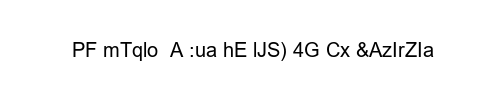

In [253]:
generate_GIF(text_list);